In [52]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"
pair2 = "BTC_XMR"
pair3 = "BTC_ETH"
pair4 = "BTC_STR"

start=string2ts("2017-10-02 00:00:00")
end=string2ts("2017-12-11 00:00:00")
period=3600*4

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df2 = prepareData(pair=pair2,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df3  = prepareData(pair=pair3,
                  start=start,
                  end=end,
                  period=period)

# trayendo y preparando datos
df4  = prepareData(pair=pair4,
                  start=start,
                  end=end,
                  period=period)


per = 0.45
cum_return1 = marketReturn(df["close"])
#cum_return1 = marketReturn(df_train)
#cum_return2 = marketReturn(df_test) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,1.7)

from strategy2 import EMAvsSMA,pricevsEMA, pricevsSMA, SMAvsSMA, EMAvsSMA2
from profit import profit,profit2

#EMA_5vsSMA_13
#w = SMAvsSMA(df['close'])
#relativeReturn,v = profit(w)

#EMA_5vsSMA_13
#w9 = EMAvsSMA(df['close'])
#relativeReturn9,v9 = profit(w9)

#Precio vs SMA_20
#w3 = pricevsSMA(df['close'])
#relativeReturn3,v3 = profit(w3)

# EMA vs SMA
# 23.6
w2 = EMAvsSMA2(df['close'], df["volatility"])
relativeReturn2,v2 = profit(w2)

#ml_logreg 
# recalculando el tiempo inicial en virtud del entrenamiento del
# algoritmo 
start2 = ml_init_time(end,start,per)
# cargando y preparando datos
df12 = prepareData(pair=pair, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df12,pair,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df12,pair,True,per)
relativeReturn6,v6 = profit(w6)

returns1 = pd.DataFrame(index=df.index)

returns1["knn"] = v6*100
returns1["sma2"] = v2*100

returns1.fillna(method='bfill', inplace=True)
# Guardando los datos como lista de diccionarios en un archivo de texto
# esto permite acceder a ellos y trabajar como data frame offline

 
    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)

per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	USDT_BTC

Retorno del mercacdo: 275.959038489
Retorno de EMA vs SMA2: 153.669981558
Retorno de ml_logreg: 236.24415403
Retorno de ml_knn: 310.796498162


378.0
462 462 420 420 840 0.45


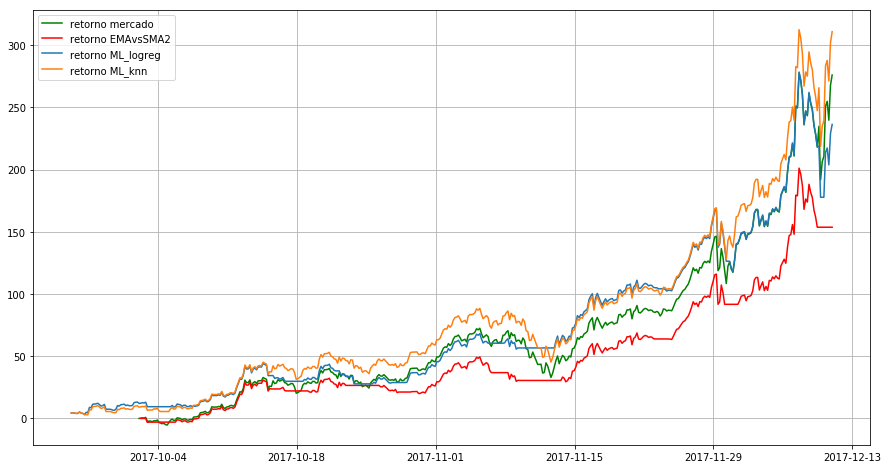

In [53]:
plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
#plt.plot(df.index[:],v*100,'y',label='retorno EMAvsSMA')
#plt.plot(df.index[:],v3*100,'b',label='retorno SMA_20')
plt.plot(df.index[:],v2*100,'r',label='retorno EMAvsSMA2')
plt.plot(df12.index[int(len(df12)*per):],v4*100,label='retorno ML_logreg')
#plt.plot(df2.index[int(len(df2)*per):],v5*100,label='retorno ML_randfor')
plt.plot(df12.index[int(len(df12)*per):],v6*100,label='retorno ML_knn')

plt.legend(loc='best')
plt.grid()

print len(df12)*per
print len(df12.index[int(len(df12)*per):]), len(v4), len(v2), len(df.index), len(df12.index), per

In [54]:
w2 = EMAvsSMA2(df2['close'], df2["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df2["close"])[-1]*100 

# cargando y preparando datos
df22 = prepareData(pair=pair2, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df22,pair2,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df22,pair2,True,per)
relativeReturn6,v6 = profit(w6)

returns2 = pd.DataFrame(index=df.index)
returns2["knn"] = v6*100
returns2["sma2"] = v2*100


print "\n\t%s\n"%pair2
print 'Retorno del mercacdo: %s'%(marketRet)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)



	BTC_XMR

Retorno del mercacdo: -24.7113848995
Retorno de EMA vs SMA2: -1.43033886662
Retorno de ml_logreg: -5.4221934681
Retorno de ml_knn: -17.960864385


In [55]:
w2 = EMAvsSMA2(df3['close'], df3["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df3["close"])[-1]*100 


# cargando y preparando datos
df23 = prepareData(pair=pair3, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df23,pair3,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df23,pair3,True,per)
relativeReturn6,v6 = profit(w6)

returns3 = pd.DataFrame(index=df.index)
returns3["knn"] = v6*100
returns3["sma2"] = v2*100

print "\n\t%s\n"%pair3
print 'Retorno del mercacdo: %s'%(marketRet)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)


	BTC_ETH

Retorno del mercacdo: -59.2975069658
Retorno de EMA vs SMA2: -10.8677361772
Retorno de ml_logreg: -6.00112196352
Retorno de ml_knn: -3.92665694883


In [56]:
w2 = EMAvsSMA2(df4['close'], df4["volatility"])
relativeReturn2,v2 = profit(w2)

marketRet = marketReturn(df4["close"])[-1]*100 

# cargando y preparando datos
df24 = prepareData(pair=pair4, start=start2, end=end, period=period)
w4, t = run_strategy("ml_logreg",df24,pair4,True,per)
relativeReturn4,v4 = profit(w4)
#w5, t = run_strategy("ml_randfor",df2,pair,True,per)
#relativeReturn5,v5 = profit(w5)
w6, t = run_strategy("ml_knn",df24,pair4,True,per)
relativeReturn6,v6 = profit(w6)

returns4 = pd.DataFrame(index=df.index)
returns4["knn"] = v6*100
returns4["sma2"] = v2*100


print "\n\t%s\n"%pair4
print 'Retorno del mercacdo: %s'%(marketRet)
#print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
#print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
#print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
#print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
print 'Retorno de ml_knn: %s'%(relativeReturn6*100)


	BTC_STR

Retorno del mercacdo: 163.973063973
Retorno de EMA vs SMA2: 217.286893495
Retorno de ml_logreg: 254.629364802
Retorno de ml_knn: 333.083261969


In [57]:
writer = pd.ExcelWriter('2w_returns.xlsx')
returns1.to_excel(writer,'%s'%pair)
returns2.to_excel(writer,'%s'%pair2)
returns3.to_excel(writer,'%s'%pair3)
returns4.to_excel(writer,'%s'%pair4)
writer.save()

In [58]:
orders = len(w4[w4["orders"] != "WAIT"])
print orders
print (relativeReturn4 - orders*0.0025)*100

40
244.629364802


In [59]:
from poloniex import Poloniex

polo = Poloniex()

markets = polo.returnTicker()
pairs = []
for name, thinks in markets.items():
    pairs.append(name)
pairs = [x for x in pairs if x.split("_")[0] == "BTC"]
print pairs

[u'BTC_CVC', u'BTC_XVC', u'BTC_PINK', u'BTC_SYS', u'BTC_EMC2', u'BTC_RADS', u'BTC_SC', u'BTC_MAID', u'BTC_BCH', u'BTC_GNT', u'BTC_BCN', u'BTC_REP', u'BTC_BCY', u'BTC_GNO', u'BTC_FCT', u'BTC_GAS', u'BTC_LBC', u'BTC_DCR', u'BTC_AMP', u'BTC_XPM', u'BTC_NXT', u'BTC_VTC', u'BTC_PASC', u'BTC_GRC', u'BTC_NXC', u'BTC_BTCD', u'BTC_LTC', u'BTC_DASH', u'BTC_STORJ', u'BTC_ZEC', u'BTC_BURST', u'BTC_BELA', u'BTC_STEEM', u'BTC_ETC', u'BTC_ETH', u'BTC_HUC', u'BTC_STRAT', u'BTC_LSK', u'BTC_EXP', u'BTC_CLAM', u'BTC_ZRX', u'BTC_BLK', u'BTC_XRP', u'BTC_NEOS', u'BTC_OMG', u'BTC_BTS', u'BTC_DOGE', u'BTC_SBD', u'BTC_XCP', u'BTC_BTM', u'BTC_OMNI', u'BTC_NAV', u'BTC_FLDC', u'BTC_XBC', u'BTC_DGB', u'BTC_VRC', u'BTC_RIC', u'BTC_STR', u'BTC_POT', u'BTC_XMR', u'BTC_VIA', u'BTC_XEM', u'BTC_NMC', u'BTC_ARDR', u'BTC_FLO', u'BTC_GAME', u'BTC_PPC']


In [65]:
start=string2ts("2017-10-02 00:00:00")

markets_returns = []
EMAvsSMA2_returns = []
logreg_returns = []
knn_returns = []

for pair in pairs:

    df4  = prepareData(pair=pair,
                      start=start,
                      end=end,
                      period=period)
    
    w2 = EMAvsSMA2(df4['close'], df4["volatility"])
    relativeReturn2,v2 = profit(w2)

    marketRet = marketReturn(df4["close"])[-1]*100 

    #ml_logreg 
    # recalculando el tiempo inicial en virtud del entrenamiento del
    # algoritmo 
    start2 = ml_init_time(end,start,per)
    # cargando y preparando datos
    try:
        df24 = prepareData(pair=pair, start=start2, end=end, period=period)
    except:
        continue
    w4, t = run_strategy("ml_logreg",df24,pair,True,per)
    relativeReturn4,v4 = profit(w4)
    #w5, t = run_strategy("ml_randfor",df2,pair,True,per)
    #relativeReturn5,v5 = profit(w5)
    w6, t = run_strategy("ml_knn",df24,pair,True,per)
    relativeReturn6,v6 = profit(w6)

    returns4 = pd.DataFrame(index=df.index)
    returns4["knn"] = v6*100
    returns4["sma2"] = v2*100

    markets_returns.append([pair, marketRet])
    EMAvsSMA2_returns.append([pair, relativeReturn2*100])
    logreg_returns.append([pair, relativeReturn4*100])
    knn_returns.append([pair, relativeReturn6*100])


    print "\n\t%s\n"%pair
    print 'Retorno del mercacdo: %s'%(marketRet)
    #print 'Retorno de SMA vs SMA: %s'%(relativeReturn*100)
    #print 'Retorno de EMA vs SMA: %s'%(relativeReturn9*100)
    #print 'Retorno de Precio vs SMA20: %s'%(relativeReturn3*100)
    print 'Retorno de EMA vs SMA2: %s'%(relativeReturn2*100)
    print 'Retorno de ml_logreg: %s'%(relativeReturn4*100)
    #print 'Retorno de ml_randfor: %s'%(relativeReturn5*100)
    print 'Retorno de ml_knn: %s'%(relativeReturn6*100)

per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_CVC

Retorno del mercacdo: -78.7162162162
Retorno de EMA vs SMA2: -39.2920200554
Retorno de ml_logreg: -59.5800546761
Retorno de ml_knn: -53.6824472434
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_XVC

Retorno del mercacdo: -43.1903124533
Retorno de EMA vs SMA2: -17.5234368156
Retorno de ml_logreg: -34.0382545525
Retorno de ml_knn: 39.9720152149
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_PINK

Retorno del mercacdo: -71.5563506261
Retorno de EMA vs SMA2: -32.0907181534
Retorno de ml_logreg: -57.9645898283
Retorno de ml_knn: -38.8034332783
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_SYS

Retorno del mercacdo: -39.3748207628
Retorno de EMA vs SMA2: 3.34989347233
Retorno de ml_logreg: -18.0795063861
Retorno de ml_knn: -24.9967594019
per: 0.45


	BTC_ETC

Retorno del mercacdo: -41.090330586
Retorno de EMA vs SMA2: -7.83626399248
Retorno de ml_logreg: 21.5705269318
Retorno de ml_knn: 57.6119739226
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_ETH

Retorno del mercacdo: -59.2975069658
Retorno de EMA vs SMA2: -10.8677361772
Retorno de ml_logreg: -6.00112196352
Retorno de ml_knn: -3.92665694883
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_HUC

Retorno del mercacdo: -49.060822898
Retorno de EMA vs SMA2: -66.4828602878
Retorno de ml_logreg: -48.8724307216
Retorno de ml_knn: -41.7897865992
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_STRAT

Retorno del mercacdo: -37.4414653802
Retorno de EMA vs SMA2: -19.8947303933
Retorno de ml_logreg: -29.4475012433
Retorno de ml_knn: -5.41798314304
per: 0.45, 1-Per: 0.55, Pocentaje Test-Train 1

Nuevo tiempo inicial 2017-07-24 00:00:00


	BTC_LSK


In [64]:
strat = [markets_returns, EMAvsSMA2_returns, logreg_returns, knn_returns]

for st in strat:
    st.sort(key = lambda l:l[1], reverse=True)
    print "\n",st[0:5],"\n"


[[u'BTC_EMC2', 246.48036788114644], [u'BTC_STR', 163.97306397306411], [u'BTC_NXT', 145.9374999999996], [u'BTC_VTC', 111.5631691648821], [u'BTC_SBD', 105.96147537142038]] 


[[u'BTC_STR', 2.1728689349478492], [u'BTC_EMC2', 1.9135604041122765], [u'BTC_NXT', 1.1462460271919763], [u'BTC_PASC', 1.0522429893443017], [u'BTC_VTC', 0.84085739580309138]] 


[[u'BTC_EMC2', 6.2436479487691212], [u'BTC_STR', 2.5462936480174667], [u'BTC_NXT', 2.4468535246420133], [u'BTC_BCH', 2.1841679839520323], [u'BTC_POT', 0.90663074146212663]] 


[[u'BTC_EMC2', 5.2952028131323692], [u'BTC_STR', 3.3308326196907405], [u'BTC_BCH', 1.3596935273796755], [u'BTC_ARDR', 1.3228951518969079], [u'BTC_NXT', 1.319493243244044]] 

